In [2]:
# models to test:
# Decision Tree
# Random Forest
# Ridge
# Naive Bays
# KNN


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("allsymptomsdisease.csv")
df.head()

,text,label
0,I have been having migraines and headaches. I ...,308
1,I have asthma and I get wheezing and breathing...,35
2,Signs and symptoms of primary ovarian insuffic...,798
3,"cough,high_fever,breathlessness,family_history...",149
4,"chills,vomiting,high_fever,sweating,headache,n...",596


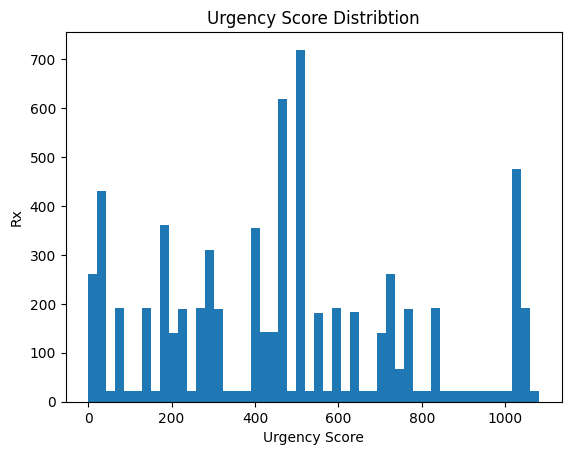

In [5]:
# Analyize the Distrubtion of Labels
plt.hist(df["label"], bins=50)
plt.title("Urgency Score Distribtion")
plt.xlabel("Urgency Score")
plt.ylabel("Rx")
plt.show()

In [6]:
df["label"].describe()

count    7043.000000
mean      469.309811
std       296.592182
min         0.000000
25%       234.000000
50%       466.000000
75%       684.500000
max      1081.000000
Name: label, dtype: float64

In [7]:
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# clean data, put everything lowercase and remove smptomls and puntuation
def cleaner(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df["text"] = df["text"].apply(cleaner)

In [9]:
# separate labels and features, vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["label"].values

In [10]:
# train/text split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# train Ridge model
Rmodel = Ridge(alpha = 1.0)
Rmodel.fit(X_train, y_train)

Ridge()

In [12]:
# Evaluate performance
y_predictions = Rmodel.predict(X_test)
rmse = mean_squared_error(y_test, y_predictions, squared = False)

C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
mae = mean_absolute_error(y_test, y_predictions)

In [14]:
r2 = r2_score(y_test, y_predictions)

In [15]:
print(f"RMSE: {rmse}")

RMSE: 138.9733638016502


In [16]:
print(f"MAE: {mae}")

MAE: 69.85254758325533


In [17]:
print(f"R-Squared: {r2}")

R-Squared: 0.7781133036072132


In [18]:
# bucket results
results = pd.DataFrame({
    "Actual":y_test,
    "Predicted":y_predictions
})

bins = [0, 100, 375, 675, 900, 1200]
labels = ["0-100", "101-375", "376-675", "676-900", "900+"]
results["bucket"] = pd.cut(results["Actual"], bins=bins, labels=labels, right=False)

In [19]:
bucket_errors = results.groupby("bucket").apply(
    lambda group: pd.Series({
        "Count": len(group),
        "MAE" : mean_absolute_error(group["Actual"], group["Predicted"]),
        "RMSE" : mean_squared_error(group["Actual"], group["Predicted"], squared=False)
    })
).reset_index()

C:\Users\jacob\AppData\Local\Temp\ipykernel_13296\200105439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_errors = results.groupby("bucket").apply(
C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 

In [20]:
bucket_errors

,bucket,Count,MAE,RMSE
0,0-100,200.0,67.416215,136.222661
1,101-375,326.0,88.479320,160.127521
2,376-675,553.0,27.392938,62.451278
3,676-900,177.0,98.327411,158.114837
4,900+,153.0,153.872495,236.543498


In [21]:
# try gradient boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
gbmodel = GradientBoostingRegressor(
    n_estimators = 300,
    learning_rate = 0.1,
    max_depth = 4,
    random_state = 42
)
gbmodel.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)

In [24]:
y_predictions_gradient = gbmodel.predict(X_test)

In [25]:
rmse = mean_squared_error(y_test, y_predictions_gradient, squared = False)
mae = mean_absolute_error(y_test, y_predictions_gradient)
r2 = r2_score(y_test, y_predictions_gradient)


C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 169.56163112622633
MAE: 127.03396680862006
R-Squared: 0.6696888026105148


In [27]:
# try random forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rfmodel.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [29]:
y_predictions_rf = rfmodel.predict(X_test)

In [30]:
rmse = mean_squared_error(y_test, y_predictions_rf, squared = False)
mae = mean_absolute_error(y_test, y_predictions_rf)
r2 = r2_score(y_test, y_predictions_rf)


C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 132.75367207072347
MAE: 54.666912704045416
R-Squared: 0.7975297539484809


In [32]:
# try decision tree regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtmodel = DecisionTreeRegressor(max_depth=10, random_state=42)
dtmodel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [35]:
y_predictions_dt = dtmodel.predict(X_test)

In [36]:
rmse = mean_squared_error(y_test, y_predictions_dt, squared = False)
mae = mean_absolute_error(y_test, y_predictions_dt)
r2 = r2_score(y_test, y_predictions_dt)


C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 245.3649689891409
MAE: 184.03340635269794
R-Squared: 0.3083390748622792


In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knmodel = KNeighborsRegressor(n_neighbors=5, n_jobs=1)

In [41]:
knmodel.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=1)

In [42]:
y_predictions_kn = knmodel.predict(X_test)

In [43]:
rmse = mean_squared_error(y_test, y_predictions_kn, squared = False)
mae = mean_absolute_error(y_test, y_predictions_kn)
r2 = r2_score(y_test, y_predictions_kn)

C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 143.80695669851997
MAE: 60.995457771469134
R-Squared: 0.762410131990364


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best params:", search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [46]:
y_predictions_best_model = best_model.predict(X_test)

In [47]:
rmse = mean_squared_error(y_test, y_predictions_best_model, squared = False)
mae = mean_absolute_error(y_test, y_predictions_best_model)
r2 = r2_score(y_test, y_predictions_best_model)

C:\Users\jacob\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

RMSE: 132.52632354429895
MAE: 54.821305890702625
R-Squared: 0.7982226447091361
